<a href="https://colab.research.google.com/github/Hadi-Saghir/Deep-Learning-Notebooks/blob/main/Lab_4_(1_3)_5TF078_Hadi_Saghir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 4: Laboration tal- och textigenkänning**
## Author: Hadi Saghir (hasa0182)

This lab will demonstrate knowledge and ability to apply a recurrent neural network (RNN) model to make prediction on time series.

This document will contain following parts:
- Embedding
- IMDB reviews
- BERT

#Embedding

I will embed different names with their corresponding religions. I will be using the Big Five world religions: Christianity, Islam, Judism, Hinduism and Buddhism. I will embed 10 names per religion, amount to 50 names in total.

In [ ]:
!pip install gensim
from gensim.models import KeyedVectors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import Word2Vec

# I picked a list on the internet of the most common names

# Names with their corresponding religions (names overlap)
names = [
    ('Muhammad', 'Islam'), ('Ali', 'Islam'), ('Fatima', 'Islam'), ('Aisha', 'Islam'),
    ('Hassan', 'Islam'), ('Fatimah', 'Islam'), ('Ahmad', 'Islam'), ('Abdullah', 'Islam'),
    ('Hasan', 'Islam'), ('Maryam', 'Islam'), ('Michael', 'Christianity'), ('Joshua', 'Christianity'),
    ('Matthew', 'Christianity'), ('David', 'Christianity'), ('James', 'Christianity'),
    ('Joseph', 'Christianity'), ('John', 'Christianity'), ('Christopher', 'Christianity'),
    ('Daniel', 'Christianity'), ('Anthony', 'Christianity'), ('Isaac', 'Judaism'),
    ('Aaron', 'Judaism'), ('Jacob', 'Judaism'), ('Moses', 'Judaism'), ('Samuel', 'Judaism'),
    ('David', 'Judaism'), ('Joseph', 'Judaism'), ('Joshua', 'Judaism'), ('Daniel', 'Judaism'),
    ('Shimon', 'Judaism'), ('Vishnu', 'Hinduism'), ('Krishna', 'Hinduism'), ('Rama', 'Hinduism'),
    ('Shiva', 'Hinduism'), ('Devi', 'Hinduism'), ('Durga', 'Hinduism'), ('Lakshmi', 'Hinduism'),
    ('Saraswathi', 'Hinduism'), ('Hanuman', 'Hinduism'), ('Ganesh', 'Hinduism'),
    ('Siddhartha', 'Buddhism'), ('Buddha', 'Buddhism'), ('Dharma', 'Buddhism'),
    ('Sangha', 'Buddhism'), ('Karma', 'Buddhism'), ('Nirvana', 'Buddhism'), ('Bhikku', 'Buddhism'),
    ('Ananda', 'Buddhism'), ('Dhamma', 'Buddhism'), ('Kuan Yin', 'Buddhism')
]

# Creating a Word2Vec model and training it on the names
model = Word2Vec(names, min_count=1)

# Embedding the names
name_vectors = model.wv

# Checking the embedding for a specific name
print(name_vectors['Muhammad'].shape)

(100,)


In [ ]:
# checking the similarity between two names (the result vary quite every run)
print(name_vectors.similarity('Muhammad', 'Hassan')) # Output: 0.16019943
print(name_vectors.similarity('Sangha', 'David')) # Output: -0.051387083

-0.089486286
0.09042595


In [ ]:
import numpy as np
import random
vocab = random.sample(list(name_vectors.vocab), 51)

In [ ]:
X = np.array([name_vectors[v] for v in vocab])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


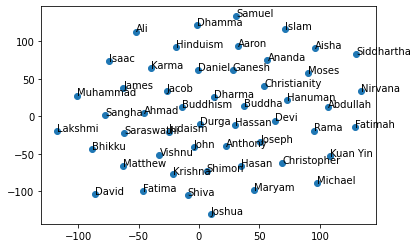

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)


Y = tsne.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(vocab, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()